In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics import f1_score


import networkx as nx
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve,roc_auc_score,fbeta_score,recall_score
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn.svm import SVC

sns.set(style="whitegrid")
np.random.seed(203)

2023-12-03 21:08:47.424227: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 21:08:47.424291: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 21:08:47.426560: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 21:08:47.647789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_classes = pd.read_csv("dataset/elliptic_txs_classes.csv")
df_edges = pd.read_csv("dataset/elliptic_txs_edgelist.csv")
df_features = pd.read_csv("dataset/elliptic_txs_features.csv", header=None)

In [3]:
colNames1 = {'0': 'txId', 1: "Time step"}
colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(93)}
colNames3 = {str(ii+95): "Aggregate_feature_" + str(ii+1) for ii in range(72)}

colNames = dict(colNames1, **colNames2, **colNames3 )
colNames = {int(jj): item_kk for jj,item_kk in colNames.items()}

In [4]:
df_features = df_features.rename(columns=colNames)

In [5]:
df_classes.loc[df_classes['class'] == 'unknown', 'class'] = 3
print('Shape of classes', df_classes.shape)
print('Shape of edges', df_edges.shape)
print('Shape of features', df_features.shape)

Shape of classes (203769, 2)
Shape of edges (234355, 2)
Shape of features (203769, 167)


<BarContainer object of 3 artists>

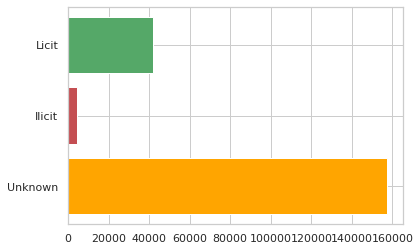

In [6]:
group_class = df_classes.groupby('class').count()
plt.barh(['Unknown', 'Ilicit', 'Licit'], group_class['txId'].values, color=['orange', 'r', 'g'] )

In [7]:
df_features.columns

Index(['txId', 'Time step', 'Local_feature_1', 'Local_feature_2',
       'Local_feature_3', 'Local_feature_4', 'Local_feature_5',
       'Local_feature_6', 'Local_feature_7', 'Local_feature_8',
       ...
       'Aggregate_feature_63', 'Aggregate_feature_64', 'Aggregate_feature_65',
       'Aggregate_feature_66', 'Aggregate_feature_67', 'Aggregate_feature_68',
       'Aggregate_feature_69', 'Aggregate_feature_70', 'Aggregate_feature_71',
       'Aggregate_feature_72'],
      dtype='object', length=167)

Text(0.5, 1.0, 'Number of transactions by Time step')

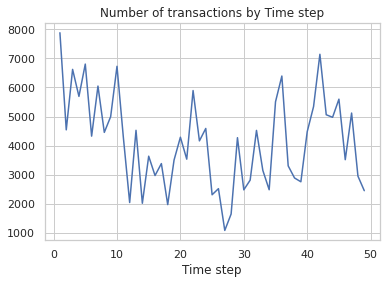

In [8]:
group_feature = df_features.groupby('Time step').count()
group_feature['txId'].plot()
plt.title('Number of transactions by Time step')

In [9]:
class1 = group_class_feature[group_class_feature['class'] == '1']
class2 = group_class_feature[group_class_feature['class'] == '2']
class3 = group_class_feature[group_class_feature['class'] == '3' ]

p1 = plt.bar(class3['Time step'], class3['count'], color = 'orange')

p2 = plt.bar(class2['Time step'], class2['count'], color='g',
             bottom=class3['count'])

p3 = plt.bar(class1['Time step'], class1['count'], color='r',
             bottom=np.array(class3['count'])+np.array(class2['count']))

plt.xlabel('Time step')

NameError: name 'group_class_feature' is not defined

In [10]:
ilicit_ids = df_class_feature.loc[(df_class_feature['Time step'] == 20) & (df_class_feature['class'] == '1'), 'txId']
ilicit_edges = df_edges.loc[df_edges['txId1'].isin(ilicit_ids)]

graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

NameError: name 'df_class_feature' is not defined

In [11]:
del df_classes
del df_edges
del df_features

In [12]:
raw_features=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_features.csv")
raw_classes=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_classes.csv")
raw_edgelist=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_edgelist.csv")

In [13]:
raw_classes['class'].value_counts()

class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64

In [14]:
# renaming columns
raw_features.columns = ['id', 'time'] + [f'trans_feat_{i}' for i in range(93)] + [f'agg_feat_{i}' for i in range(72)]
raw_features.head()

,id,time,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


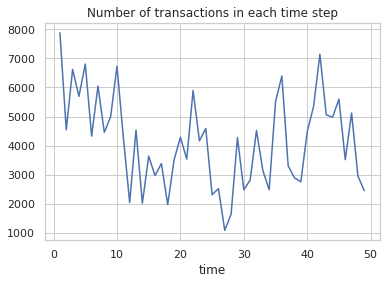

In [15]:
raw_features['time'].value_counts().sort_index().plot();
plt.title('Number of transactions in each time step');

In [16]:
# merge with classes
raw_features = pd.merge(raw_features, raw_classes, left_on='id', right_on='txId', how='left')

In [17]:
raw_features.head()


,id,time,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,txId,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,5530458,unknown
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,232022460,unknown
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,232438397,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,230460314,unknown
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,230459870,unknown


In [18]:
raw_features=raw_features.rename(columns={"class":"Class"})

In [19]:
cleaned_df = raw_features.copy()
# You don't want the `Time` column.
cleaned_df.pop('time')
# You don't want the `txId` column.
cleaned_df.pop('txId')
# You don't want the `id` column.
cleaned_df.pop('id')

0           5530458
1         232022460
2         232438397
3         230460314
4         230459870
            ...    
203763    173077460
203764    158577750
203765    158375402
203766    158654197
203767    157597225
Name: id, Length: 203768, dtype: int64

In [20]:
cleaned_df['Class'].replace({"unknown": "-1"}, inplace=True)
cleaned_df['Class'].replace({"1": "1"}, inplace=True)
cleaned_df['Class'].replace({"2": "0"}, inplace=True)
cleaned_df['Class'] = pd.to_numeric(cleaned_df['Class'])

In [21]:
#Create array of unknown Class randomly with the same proportion 1/10 between "zeros" and "ones"
#df["new_column"] = np.random.choice([1, 0], len(df), p=[0.7, 0.3])   #  0) First step
def rand_bin_array(K, N):
    arr = np.zeros(N,int)

    arr[:K]  = int( 1)
    np.random.shuffle(arr)
    return arr

In [22]:
# Put togheter all Classes
prueba_0=cleaned_df[cleaned_df['Class']==0] # 1) Split "0" Class array 
prueba_0

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,Class
2,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,0
8,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,0.020069,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,0
9,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
10,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
15,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,-0.047227,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203739,-0.133841,-0.109114,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.123596,-0.129972,-0.049707,...,1.467840,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
203749,-0.172455,-0.138626,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163104,-0.168926,-0.049707,...,-0.569462,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
203751,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,-0.149635,-0.155646,-0.049707,...,1.408971,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035,0
203753,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163622,-0.169437,-0.049707,...,0.647874,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792,0


In [23]:
prueba_1=cleaned_df[cleaned_df['Class']==1] # 1) Split "1" Class array 
prueba_1

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,Class
906,-0.172669,0.048298,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163319,-0.169138,-0.049707,...,-0.285627,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
1360,-0.164417,0.048298,-1.201369,0.178180,-0.043875,0.222447,-0.061584,-0.163580,-0.164278,-0.022718,...,-0.500080,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,1
2717,-0.164272,0.048298,-1.201369,0.028105,-0.043875,0.054722,-0.061584,-0.163191,-0.163923,-0.016812,...,1.757982,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
2814,-0.168195,0.048298,-1.201369,-0.046932,-0.063725,-0.029140,-0.061584,-0.163574,-0.164695,-0.006824,...,-0.600999,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,1
3422,-0.169109,0.048298,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.162900,-0.166282,-0.027389,...,0.584799,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203684,-0.172493,-0.090143,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163588,-0.169212,-0.048440,...,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203707,-0.172795,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163639,-0.169286,-0.048469,...,-0.090097,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203735,-0.170895,0.071985,1.573595,0.328255,-0.043875,0.390171,-0.061584,-0.163629,-0.168980,-0.047736,...,1.575067,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203758,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163631,-0.167106,-0.032993,...,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1


In [24]:
prueba=cleaned_df[cleaned_df['Class']==-1]  # 2) Split Class array "-1"
prueba

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,Class
0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,-1
1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,-1
3,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,-1
4,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,0.816377,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,-1
5,-0.171264,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.161887,-0.167726,-0.049707,...,-0.607306,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203761,-0.172974,-0.156732,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163636,-0.169451,-0.049707,...,0.647874,0.241128,0.241406,7.165536,1.085202,-0.131155,5.157442,-0.120613,-0.119792,-1
203763,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,-0.142008,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,-1
203764,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,-0.162334,-0.049707,...,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,-1
203766,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,-0.169317,-0.049707,...,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,-1


In [25]:
prueba['Class']=rand_bin_array(15720,157204)  # 3) Change Class array -1  target with a relation 1/10  Illicit-Licit
vertical = pd.concat([prueba, prueba_0,prueba_1], axis=0) #4) Put together all Classes
vertical=vertical.sort_index()   # 5) Order again 
vertical

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,Class
0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,0
2,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,0
3,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,0
4,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,0.816377,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203763,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,-0.142008,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
203764,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,-0.162334,-0.049707,...,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,0
203765,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163626,-0.168778,-0.045389,...,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203766,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,-0.169317,-0.049707,...,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,0


In [26]:
y=vertical['Class']
data= vertical.copy()

In [27]:
vc = data['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(data), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Count,count,percent
0,0,183503,0.0
1,1,20265,0.0


In [28]:
# Sample 1000 non-fraud entries
non_fraud = data[data['Class'] == 0].sample(1000, random_state=42)

# Select all fraud entries
fraud = data[data['Class'] == 1]

# Concatenate non_fraud and fraud dataframes
df = pd.concat([non_fraud, fraud], ignore_index=True)

# Shuffle the concatenated DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features (X) and target variable (Y)
X = df.drop(['Class'], axis=1).values
Y = df['Class'].values

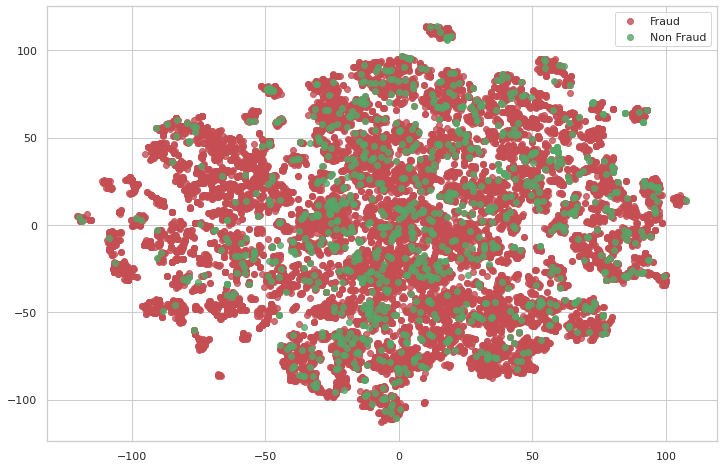

In [29]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

In [68]:
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")
x = data.drop(["Class"], axis=1)
y = data["Class"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

2023-12-03 20:59:16.539528: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [69]:
autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20);

Epoch 1/10
7/7 [==============================] - 2s 70ms/step - loss: 0.1279 - val_loss: 0.1250
Epoch 2/10
7/7 [==============================] - 0s 15ms/step - loss: 0.1279 - val_loss: 0.1250
Epoch 3/10
7/7 [==============================] - 0s 20ms/step - loss: 0.1278 - val_loss: 0.1249
Epoch 4/10
7/7 [==============================] - 0s 17ms/step - loss: 0.1278 - val_loss: 0.1249
Epoch 5/10
7/7 [==============================] - 0s 14ms/step - loss: 0.1277 - val_loss: 0.1249
Epoch 6/10
7/7 [==============================] - 0s 14ms/step - loss: 0.1277 - val_loss: 0.1248
Epoch 7/10
7/7 [==============================] - 0s 14ms/step - loss: 0.1277 - val_loss: 0.1248
Epoch 8/10
7/7 [==============================] - 0s 20ms/step - loss: 0.1276 - val_loss: 0.1248
Epoch 9/10
7/7 [==============================] - 0s 14ms/step - loss: 0.1276 - val_loss: 0.1247
Epoch 10/10
7/7 [==============================] - 0s 13ms/step - loss: 0.1275 - val_loss: 0.1247


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' contains your initial dataset
x = data.drop(["Class"], axis=1)
y = data["Class"].values

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)
# Split the data into train and test sets
x_train, x_test = train_test_split(x_scale, test_size=0.2, random_state=42)

input_layer = Input(shape=(x_train.shape[1],))

# Encoder
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

# Decoder
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

# Output layer
output_layer = Dense(x_train.shape[1], activation='relu')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adam", loss="mse")  # Changed optimizer to Adam

# Train the model
autoencoder.fit(x_train, x_train, 
                batch_size=256, epochs=10, 
                shuffle=True, validation_data=(x_test, x_test))
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

2023-12-03 21:20:05.936054: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 107589240 exceeds 10% of free system memory.


Epoch 1/10


2023-12-03 21:20:06.285897: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 107589240 exceeds 10% of free system memory.


637/637 [==============================] - 3s 4ms/step - loss: 0.0136 - val_loss: 0.0029
Epoch 2/10
637/637 [==============================] - 2s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 3/10
637/637 [==============================] - 2s 4ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/10
637/637 [==============================] - 2s 4ms/step - loss: 0.0011 - val_loss: 9.8784e-04
Epoch 5/10
637/637 [==============================] - 2s 4ms/step - loss: 9.5020e-04 - val_loss: 9.2580e-04
Epoch 6/10
637/637 [==============================] - 2s 4ms/step - loss: 8.4875e-04 - val_loss: 8.0369e-04
Epoch 7/10
637/637 [==============================] - 2s 4ms/step - loss: 7.9122e-04 - val_loss: 7.7558e-04
Epoch 8/10
637/637 [==============================] - 2s 4ms/step - loss: 7.5562e-04 - val_loss: 7.9941e-04
Epoch 9/10
637/637 [==============================] - 2s 4ms/step - loss: 6.9951e-04 - val_loss: 6.5249e-04
Epoch 10/10
637/637 [==============================] - 2s 4ms/step 

In [33]:
# Encoder model
encoder = Model(input_layer, encoded)

# Get hidden representations
norm_hid_rep = encoder.predict(x_norm[:4000])
fraud_hid_rep = encoder.predict(x_fraud)

# Evaluate the model
evaluation = autoencoder.evaluate(x_test, x_test)
print("Test Loss:", evaluation)

1274/1274 [==============================] - 2s 1ms/step - loss: 6.2595e-04
Test Loss: 0.000625951390247792


In [34]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [35]:
norm_hid_rep = hidden_representation.predict(x_norm[:4000])
fraud_hid_rep = hidden_representation.predict(x_fraud)

634/634 [==============================] - 1s 1ms/step


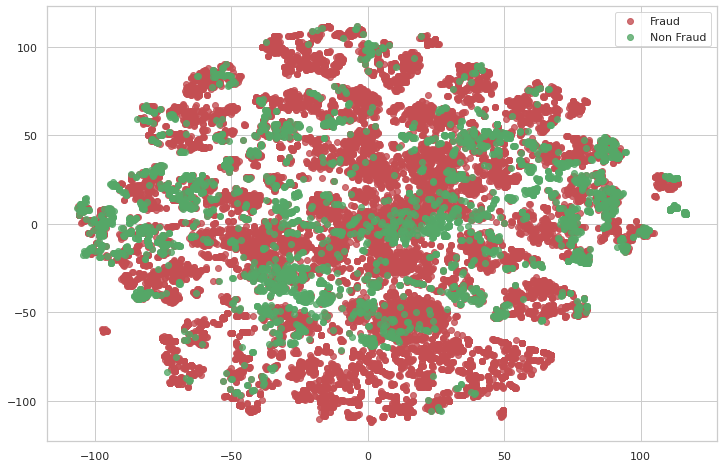

In [36]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

In [37]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs",max_iter=4000).fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.83      0.38      0.52       988
         1.0       0.89      0.99      0.94      5079

    accuracy                           0.89      6067
   macro avg       0.86      0.68      0.73      6067
weighted avg       0.88      0.89      0.87      6067


Accuracy Score:  0.8861051590571947


In [38]:
#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(val_y, pred_y)
cnf_matrix
total1=sum(sum(cnf_matrix))
#print('F1_score: {0:0.2f}'.format(F1[1]))
#####from confusion matrix calculate accuracy
accuracy1=(cnf_matrix[0,0]+cnf_matrix[1,1])/total1
print ('Accuracy : {0:0.2f}'.format(accuracy1))

Accuracy : 0.89


In [39]:
sensitivity1 = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Sensitivity : {0:0.2f}'.format(sensitivity1 ))

Sensitivity : 0.38


In [40]:
specificity1 = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Specificity : {0:0.2f}'.format(specificity1))

Specificity : 0.99


Text(0.5, 257.44, 'Predicted label')

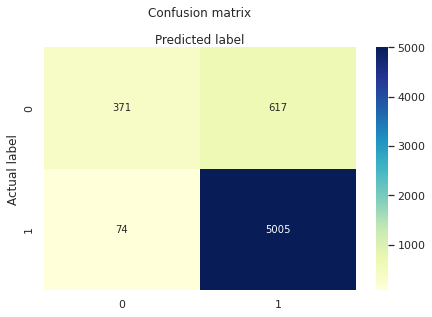

In [41]:
#Visualizing Confusion Matrix using Heatmap
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


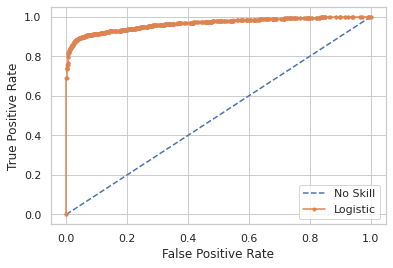

In [42]:
# predict probabilities and create ROC Curve
yhat = clf.predict_proba(val_x)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(val_y, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

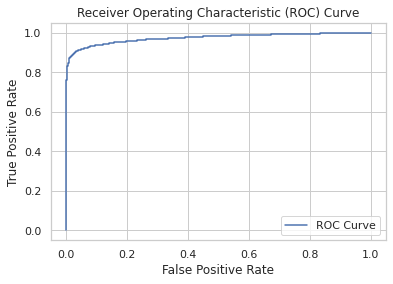

In [43]:
svc = SVC(random_state=42)
svc.fit(train_x, train_y)

# Get predicted probabilities for the positive class (class 1)
svc_probs = svc.decision_function(val_x)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(val_y, svc_probs)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [44]:
ROC_AUC=roc_auc_score(val_y, clf.predict_proba(val_x)[:, 1])
print('ROC_AUC: {0:0.2f}'.format(ROC_AUC))

ROC_AUC: 0.96


In [45]:
F1=fbeta_score(val_y,yhat[:, 1].round(),beta=1)
F2=fbeta_score(val_y,yhat[:, 1].round(),beta=2)
F_0_5=fbeta_score(val_y,yhat[:, 1].round(),beta=0.5)

print('F1-score: {0:0.2f}'.format(F1),'F2-score:  {0:0.2f}'.format(F2), 'F_0.5 score:  {0:0.2f}'.format(F_0_5 ))

F1-score: 0.94 F2-score:  0.96 F_0.5 score:  0.91


In [46]:
F1=f1_score(val_y,yhat[:, 1].round(), average=None)
print('F1_score: {0:0.2f}'.format(F1[1]))

F1_score: 0.94


In [47]:
 AS=accuracy_score(val_y,yhat[:, 1].round())
 print('Accuracy Score: {0:0.2f}'.format(AS))

Accuracy Score: 0.89


In [48]:
average_precision = average_precision_score(val_y,yhat[:, 1].round())
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.89


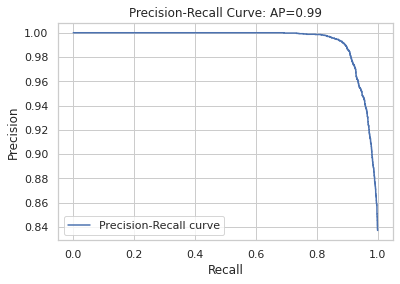

In [49]:
y_scores = clf.predict_proba(val_x)[:, 1]  # Replace with your predicted probabilities

# Compute precision-recall pairs
precision, recall, thresholds = precision_recall_curve(val_y, y_scores)

# Compute average precision
average_precision = average_precision_score(val_y, y_scores)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc='lower left')
plt.show()